In [1]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\shahr\anaconda3\python.exe -m pip install --upgrade pip


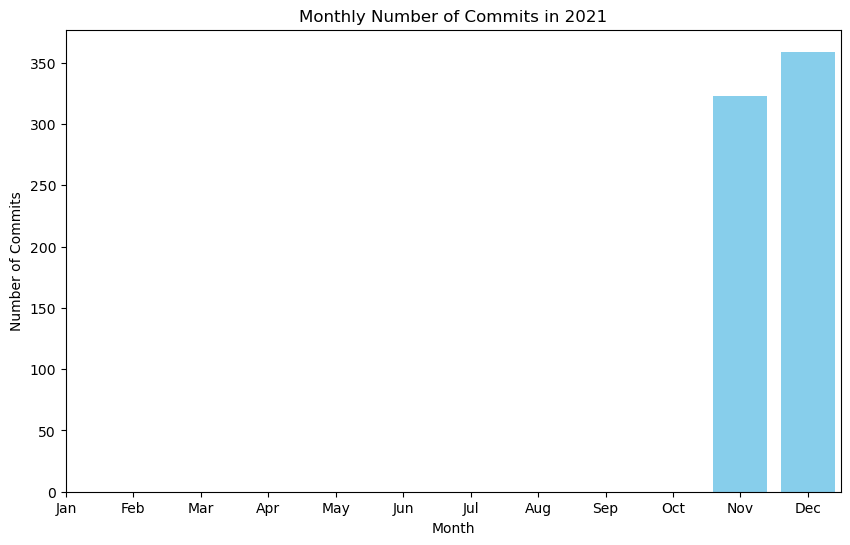

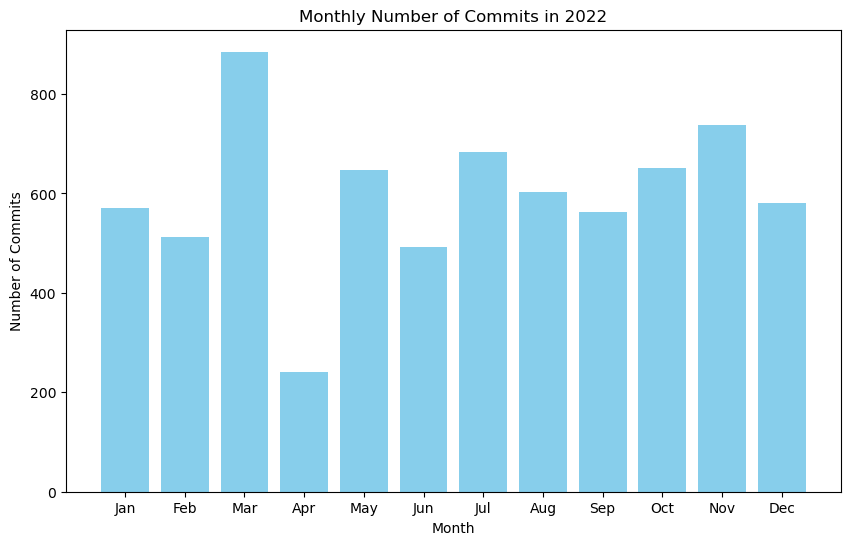

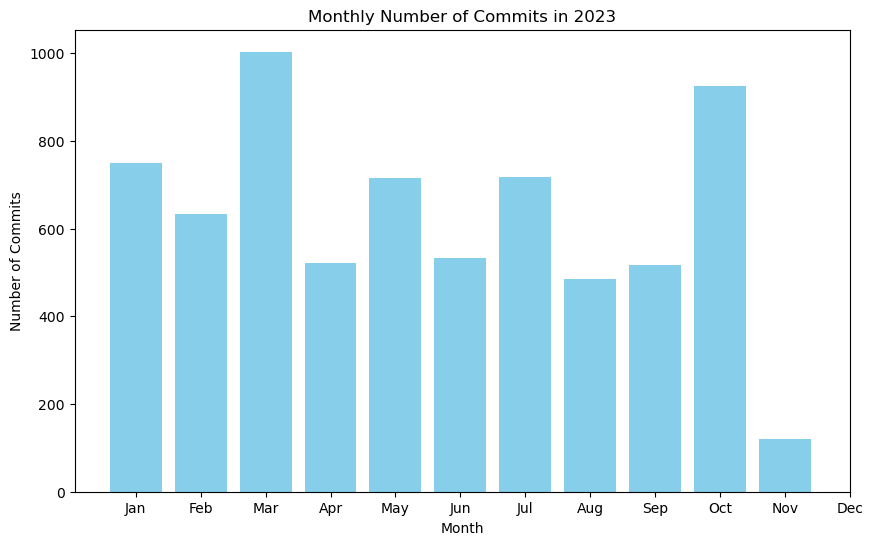

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the commit dataset
commit_df = pd.read_csv('kubernetes_commits.csv')

# Convert the commit_date column to datetime with format specified
commit_df['commit_date'] = pd.to_datetime(commit_df['commit_date'], format='%d/%m/%Y')

# Extract year and month from commit_time
commit_df['year'] = commit_df['commit_date'].dt.year
commit_df['month'] = commit_df['commit_date'].dt.month

# Group by year and month, count the number of commits
monthly_commit_counts = commit_df.groupby(['year', 'month']).size().reset_index(name='commit_count')

# Create three bar graphs for each year
for year in monthly_commit_counts['year'].unique():
    year_data = monthly_commit_counts[monthly_commit_counts['year'] == year]

    plt.figure(figsize=(10, 6))
    plt.bar(year_data['month'], year_data['commit_count'], color='skyblue')
    plt.title(f'Monthly Number of Commits in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Commits')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

Root Mean Squared Error (RMSE): 44.14750453776741


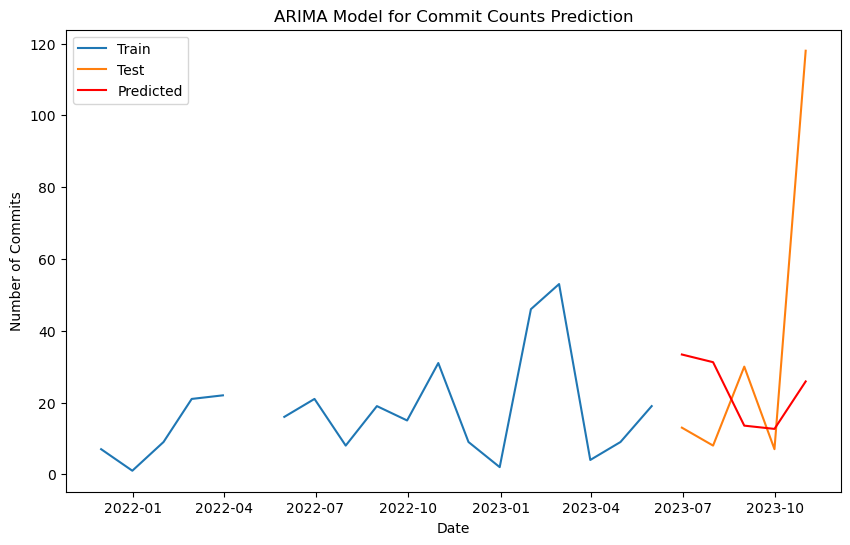

Predicted Commit Counts for December 2024: 20.289556834463475


In [11]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming monthly_commit_counts DataFrame is already available
# Use the 'commit_date' as the index for time series
commit_df['commit_date'] = pd.to_datetime(commit_df['commit_date'], format='%d/%m/%Y')
commit_ts = commit_df.groupby(['commit_date']).size().reset_index(name='commit_count')
commit_ts = commit_ts.set_index('commit_date')

# Set the frequency of the date index
commit_ts = commit_ts.asfreq('M')

# Train/test split
train_size = int(len(commit_ts) * 0.8)
train, test = commit_ts[:train_size], commit_ts[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))
fit_model = model.fit()

# Predict
forecast_steps = len(test)
predictions = fit_model.get_forecast(steps=forecast_steps)
predicted_commit_counts = predictions.predicted_mean

# Evaluate the model
mse = mean_squared_error(test['commit_count'], predicted_commit_counts)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['commit_count'], label='Train')
plt.plot(test.index, test['commit_count'], label='Test')
plt.plot(test.index, predicted_commit_counts, label='Predicted', color='red')
plt.title('ARIMA Model for Commit Counts Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Commits')
plt.legend()
plt.show()

# Predict for December 2024
forecast_steps = 12
forecast = fit_model.get_forecast(steps=forecast_steps)
forecasted_commit_counts = forecast.predicted_mean

# Print the predicted commit counts for December 2024
print(f"Predicted Commit Counts for December 2024: {forecasted_commit_counts[-1]}")
